In [1]:
#Data website: 
# https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.


# First, we read in the file and import packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture as GMM

import warnings
warnings.filterwarnings("ignore")

/Users/rabeya/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the HCC data
DBdata = pd.read_csv('diabetes_data_upload.csv')

In [3]:
DBdata.shape

(520, 17)

In [4]:
DBdata.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [5]:
DBdata.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
DBdata['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [7]:
# first, we should convert all the "Yes" into 1 and "No" into 0.
# the way to do this would be to map a dictionary into python
binary_dict = {'Yes':1, 'No':0}
gender_dict = {'Male':0, 'Female':1}


In [8]:
DBdata_copy = DBdata.copy()
for name in DBdata.columns[2:-1]:
    # every column is a pandas Series
    x = DBdata[name]
    DBdata_copy[name] = x.map(binary_dict)

DBdata_copy.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [9]:
DBdata_copy['Gender'] = DBdata['Gender'].map(gender_dict)
DBdata_copy.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [10]:
# first we need to split X_reduced the training and testing datsets
# we're going to do a 60%-40% split on the training data and test data.
X = DBdata_copy.iloc[:, :-1]
y = np.asarray(DBdata_copy.iloc[:, -1])

# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [32]:
X_train.shape, X_test.shape

((364, 16), (156, 16))

In [35]:
DBdata_copy['class'].value_counts()*0.7

Positive    224.0
Negative    140.0
Name: class, dtype: float64

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=20, criterion='entropy', n_jobs=-1, )

In [12]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, n_jobs=-1)

In [16]:
estimator_0 = rf_classifier.estimators_[0]

In [22]:
from sklearn.tree import export_graphviz
import graphviz

features=DBdata_copy.columns[:-1]
target=np.unique(DBdata_copy['class'])


# Creates dot file named tree.dot
tree_estimator = export_graphviz(estimator_0,
                out_file = None, 
                feature_names = features,
                class_names = target,
                filled = True,
                rounded = True)

# Draw graph
graph = graphviz.Source(tree_estimator, format="png") 
graph 
# save file
graph.render("/Users/rabeya/Desktop/decision_tree_graphviz_v7")



'/Users/rabeya/Desktop/decision_tree_graphviz_v7.png'

In [18]:
features

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [21]:
np.unique(DBdata_copy['class'])

array(['Negative', 'Positive'], dtype=object)

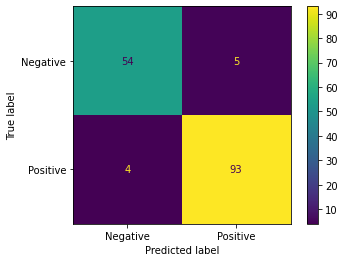

In [23]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf_classifier, X_test, y_test)
plt.show()

In [24]:
rf_classifier.feature_importances_

array([0.12196905, 0.06189661, 0.18322207, 0.21840221, 0.04909977,
       0.02418257, 0.03292142, 0.02210763, 0.02819449, 0.02538224,
       0.04045715, 0.03025059, 0.08133121, 0.02118663, 0.04059675,
       0.01879961])

In [27]:
importances_dict = {f:i for (f,i) in zip(features, rf_classifier.feature_importances_)}
importances_dict

{'Age': 0.12196905157096398,
 'Gender': 0.06189660907778365,
 'Polyuria': 0.18322206606844726,
 'Polydipsia': 0.21840221084880693,
 'sudden weight loss': 0.049099769596046394,
 'weakness': 0.024182569919606507,
 'Polyphagia': 0.032921420293088303,
 'Genital thrush': 0.02210763174807251,
 'visual blurring': 0.028194492088132003,
 'Itching': 0.025382244172222537,
 'Irritability': 0.04045715429714862,
 'delayed healing': 0.03025058720729191,
 'partial paresis': 0.08133120904589017,
 'muscle stiffness': 0.021186625102088404,
 'Alopecia': 0.04059675354326522,
 'Obesity': 0.01879960542114571}

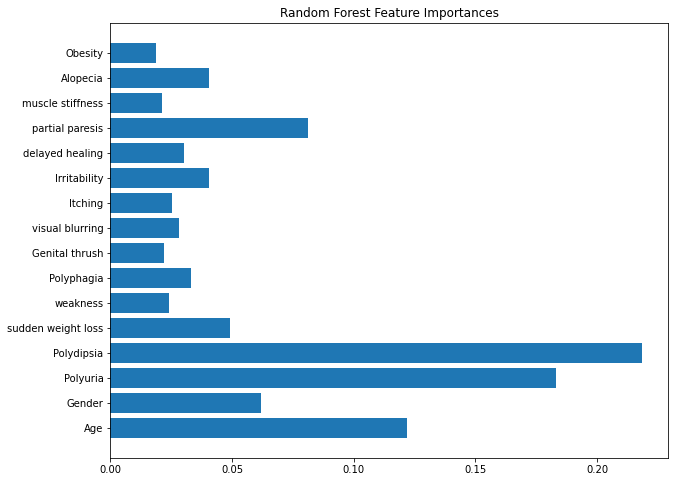

In [31]:
plt.figure(figsize=(10,8))
plt.barh(list(importances_dict.keys()), list(importances_dict.values()))
plt.title('Random Forest Feature Importances')
plt.show()

In [28]:
list(importances_dict.keys())

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']